Predicting Malaria outcomes using hematological parameters based on Random Forest model

The data used for this tutorial was obtained from this study: Morang’a, C.M., Amenga–Etego, L., Bah, S.Y. et al. Machine learning approaches classify clinical malaria outcomes based on haematological parameters. BMC Med 18, 375 (2020). https://doi.org/10.1186/s12916-020-01823-3

In [2]:
#Import python libraries

In [1]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,label_binarize
from sklearn.preprocessing import MinMaxScaler

#classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


Reading the data

In [8]:
#setting the path of the data file.
data_file='/Users/zainabusman/Home/Github/Git/malaria_clin_data.csv'

#reading the data using pandas
dataframe=pd.read_csv(data_file)

Data Overview & Cleaning
i.e. Sample size, Symptoms, Clinical features.

In [11]:
#find the number of rows and columns in the dataframe
dataframe.shape

(2207, 34)

In [13]:
#get the top rows of the table with the top 5 rows
dataframe.head(n=5)


,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,...,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,CCS20147,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,CCS20170,yes,Navrongo,2004,NaN,Yes,37.1,Not Known / Missing entry,NaN,Positive,...,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [15]:
# list the column names
dataframe.columns


Index(['SampleID', 'consent_given', 'location', 'Enrollment_Year', 'bednet',
       'fever_symptom', 'temperature', 'Suspected_Organism',
       'Suspected_infection', 'RDT', 'Blood_culture', 'Urine_culture',
       'Taq_man_PCR', 'parasite_density', 'Microscopy', 'Laboratory_Results',
       'Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [17]:
#we are interested in the columns : 'Clinical_diagnosis' up to 'RBC_dist_width_Percent'

In [19]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SampleID                2207 non-null   object 
 1   consent_given           2207 non-null   object 
 2   location                2207 non-null   object 
 3   Enrollment_Year         2207 non-null   int64  
 4   bednet                  1676 non-null   object 
 5   fever_symptom           2200 non-null   object 
 6   temperature             2197 non-null   float64
 7   Suspected_Organism      2207 non-null   object 
 8   Suspected_infection     1569 non-null   object 
 9   RDT                     2065 non-null   object 
 10  Blood_culture           122 non-null    object 
 11  Urine_culture           112 non-null    object 
 12  Taq_man_PCR             176 non-null    object 
 13  parasite_density        2173 non-null   float64
 14  Microscopy              2170 non-null   

In [21]:
subset=dataframe.iloc[:,16:]

In [23]:
subset

,Clinical_Diagnosis,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,Severe Malaria,5.7,2.80,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,Severe Malaria,7.8,3.50,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,Severe Malaria,8.2,1.00,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,Severe Malaria,15.9,3.30,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,Severe Malaria,4.5,2.10,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,Uncomplicated Malaria,12.3,4.33,10.2,32.0,74.0,23.7,32.0,277.0,12.3,7.1,71.3,22.6,6.1,8.9,2.7,0.7,16.1
2203,Non-malaria Infection,8.1,3.74,9.5,29.1,7.8,25.3,32.5,340.0,15.2,7.2,73.6,21.0,5.4,6.0,1.7,0.4,15.1
2204,Non-malaria Infection,9.5,4.38,11.9,36.6,84.0,27.2,32.6,300.0,14.3,6.5,43.6,49.4,7.0,4.3,4.6,0.6,18.2
2205,Non-malaria Infection,12.3,4.78,12.1,38.2,80.0,25.4,31.7,136.0,13.3,7.1,35.3,58.1,6.6,4.4,7.1,0.8,14.2


In [25]:
subset.shape

(2207, 18)

In [27]:
subset.info

<bound method DataFrame.info of          Clinical_Diagnosis  wbc_count  rbc_count  hb_level  hematocrit  \
0            Severe Malaria        5.7       2.80       5.8        16.1   
1            Severe Malaria        7.8       3.50       9.2        24.2   
2            Severe Malaria        8.2       1.00       2.3         5.7   
3            Severe Malaria       15.9       3.30      10.1        25.1   
4            Severe Malaria        4.5       2.10       5.7        16.1   
...                     ...        ...        ...       ...         ...   
2202  Uncomplicated Malaria       12.3       4.33      10.2        32.0   
2203  Non-malaria Infection        8.1       3.74       9.5        29.1   
2204  Non-malaria Infection        9.5       4.38      11.9        36.6   
2205  Non-malaria Infection       12.3       4.78      12.1        38.2   
2206  Non-malaria Infection        4.7       3.83       9.3        29.9   

      mean_cell_volume  mean_corp_hb  mean_cell_hb_conc  platelet_c

In [29]:
#Check the missing data. We are interested in how many missing data are present in each column
subset.isnull().sum()

Clinical_Diagnosis         0
wbc_count                  0
rbc_count                  0
hb_level                   0
hematocrit                 0
mean_cell_volume           0
mean_corp_hb               3
mean_cell_hb_conc          2
platelet_count             9
platelet_distr_width      32
mean_platelet_vl          17
neutrophils_percent        0
lymphocytes_percent        0
mixed_cells_percent        0
neutrophils_count         12
lymphocytes_count         11
mixed_cells_count         11
RBC_dist_width_Percent     9
dtype: int64

In [31]:
# handling missing values
# drop / remove all rows with missing values
subset.dropna(inplace=True)

In [33]:
subset.columns

Index(['Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [35]:
#Let us get the different malaria outcomes. 
#The outcomes will be our labels/classes in the data


In [37]:
subset['Clinical_Diagnosis'].unique()

array(['Severe Malaria', 'Uncomplicated Malaria', 'Non-malaria Infection'],
      dtype=object)

In [39]:
#class distribution
subset['Clinical_Diagnosis'].value_counts()

Clinical_Diagnosis
Non-malaria Infection    966
Uncomplicated Malaria    702
Severe Malaria           488
Name: count, dtype: int64

<Axes: xlabel='Clinical_Diagnosis'>

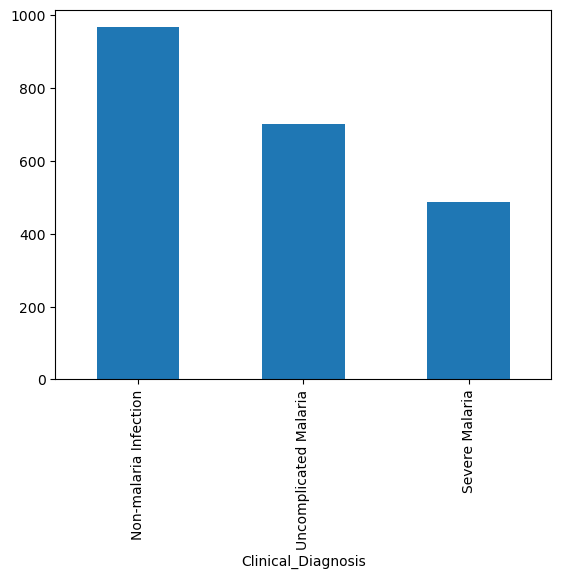

In [41]:
# plot a bar chat to display the class distribution
subset['Clinical_Diagnosis'].value_counts().plot.bar()

In [42]:
subset.head()

,Clinical_Diagnosis,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,Severe Malaria,5.7,2.8,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,Severe Malaria,7.8,3.5,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,Severe Malaria,8.2,1.0,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,Severe Malaria,15.9,3.3,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,Severe Malaria,4.5,2.1,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [45]:
#descriptive statistics on the data
subset.iloc[:,1:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wbc_count,2156.0,10.723516,5.944994,0.5,6.80,9.30,12.900,53.90
rbc_count,2156.0,3.911679,1.132454,0.5,3.34,4.17,4.650,6.67
hb_level,2156.0,9.423010,2.650261,1.4,7.90,10.20,11.325,18.70
hematocrit,2156.0,29.320223,8.802975,4.3,24.20,31.70,35.500,52.70
mean_cell_volume,2156.0,74.828256,8.046383,7.8,70.00,75.00,80.000,121.00
mean_corp_hb,2156.0,24.142189,3.203595,2.1,22.20,24.10,26.200,38.80
mean_cell_hb_conc,2156.0,32.259318,2.864637,15.7,30.60,32.10,33.425,46.60
platelet_count,2156.0,214.545176,128.697718,3.0,105.00,201.00,300.250,1087.00
platelet_distr_width,2156.0,14.137894,3.064643,0.0,12.90,14.90,15.600,23.90
mean_platelet_vl,2156.0,8.031447,1.194886,3.3,7.20,7.90,8.800,18.60


In [46]:
subset.corr(numeric_only=True)

,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
wbc_count,1.000000,-0.217584,-0.283881,-0.261736,-0.150900,-0.084770,0.066981,0.122330,0.022260,-0.100716,0.093870,-0.090940,-0.057664,0.876999,0.689196,0.715568,0.252208
rbc_count,-0.217584,1.000000,0.896557,0.922294,-0.017848,-0.348335,-0.497615,0.409424,0.001756,0.284809,0.077574,-0.073216,-0.056070,-0.134216,-0.233978,-0.200859,-0.364396
hb_level,-0.283881,0.896557,1.000000,0.968644,0.286931,0.023659,-0.302304,0.353828,0.068770,0.248323,0.162289,-0.158665,-0.093352,-0.153907,-0.338160,-0.273327,-0.562710
hematocrit,-0.261736,0.922294,0.968644,1.000000,0.279029,-0.101461,-0.479766,0.387830,0.091718,0.285169,0.119252,-0.113198,-0.083365,-0.152236,-0.294044,-0.253324,-0.510445
mean_cell_volume,-0.150900,-0.017848,0.286931,0.279029,1.000000,0.722231,-0.077781,-0.002473,0.268485,0.038404,0.094697,-0.079596,-0.111013,-0.080385,-0.168477,-0.199845,-0.413033
mean_corp_hb,-0.084770,-0.348335,0.023659,-0.101461,0.722231,1.000000,0.576017,-0.202177,0.094658,-0.189324,0.149581,-0.151628,-0.062552,-0.011729,-0.152329,-0.106754,-0.334053
mean_cell_hb_conc,0.066981,-0.497615,-0.302304,-0.479766,-0.077781,0.576017,1.000000,-0.310377,-0.187634,-0.329254,0.110667,-0.132823,0.043621,0.089524,-0.016254,0.090089,-0.013497
platelet_count,0.122330,0.409424,0.353828,0.387830,-0.002473,-0.202177,-0.310377,1.000000,0.070121,-0.036139,-0.056902,0.042694,0.089093,0.102714,0.078041,0.143232,-0.104004
platelet_distr_width,0.022260,0.001756,0.068770,0.091718,0.268485,0.094658,-0.187634,0.070121,1.000000,0.233941,0.001142,0.018399,-0.085652,0.015390,0.037808,-0.045928,-0.087467
mean_platelet_vl,-0.100716,0.284809,0.248323,0.285169,0.038404,-0.189324,-0.329254,-0.036139,0.233941,1.000000,-0.055283,0.052658,0.037840,-0.118462,-0.021988,-0.058788,-0.112433


<Axes: >

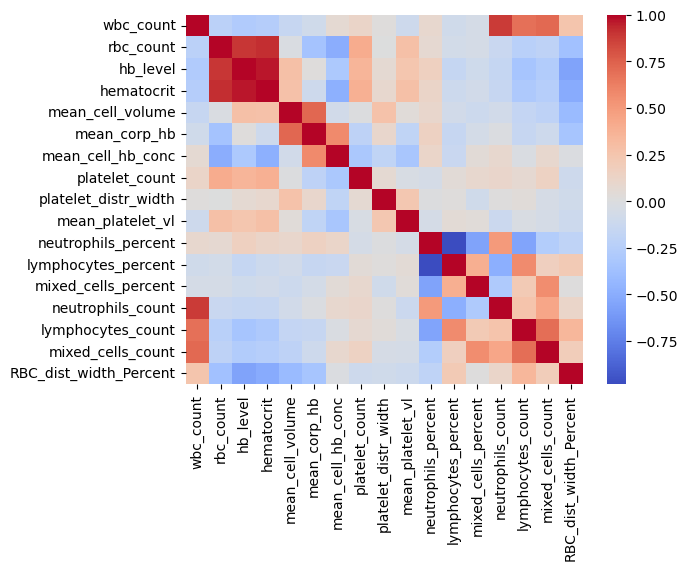

In [49]:
#lets visualize the correlation matrix using seaborn
sns.heatmap(subset.corr(numeric_only=True),cmap='coolwarm')

Data processing
this is done to put the data in an appropriate format before modelling

In [51]:
# separate the labels/classes from the features/measurement
X=subset.iloc[:,1:]
y=subset.iloc[:,0]

In [52]:
X.shape


(2156, 17)

In [56]:
y.shape

(2156,)

Encode labels

The labels for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms, hence we encoding the labels.

In [59]:
#let's encode target labels (y). We will use onehot encoding.
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
labels=label_encoder.classes_

In [61]:
labels[0:5]

array(['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria'],
      dtype=object)

In [63]:
y[0:5]

array([1, 1, 1, 1, 1])

In [65]:

classes=np.unique(y)
y=label_binarize(y,classes=np.unique(y))
nclasses=y.shape[1]

In [67]:
classes

array([0, 1, 2])

In [69]:
nclasses

3

Data Splitting

Data is split into three: training, validation and test sets
-training set is used for training.
-validation set is used for evaluating the model during training.
-test set is used to test the model after training and tuning has been completed.



In [72]:
#split data into training,validation and test sets

#split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)



In [74]:
X_train.shape

(1724, 17)

In [76]:
y_train.shape

(1724, 3)

In [78]:
X_test.shape

(432, 17)

In [80]:
y_test.shape

(432, 3)

Data Normalization

Data normalization is done so that the values are in the same range. This will improve the model performance and avoid bias.
Normalization is performed separately on each data set. This is done to prevent data leakage.


In [83]:
### scale the data between 0-1
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_test=min_max_scaler.fit_transform(X_test)

In [85]:
X_train[0,0]

0.18726591760299627

In [87]:
X_train.iloc[0,0]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [89]:
#Build the Random Forest 

In [97]:
#training phase: create RF classifier

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train_scaled,y_train)

NameError: name 'X_train_scaled' is not defined

In [99]:
#Testing phase: model prediction
y_pred=clf.predict(X_test_scaled)

NameError: name 'X_test_scaled' is not defined

In [101]:
y_pred[0:3]

NameError: name 'y_pred' is not defined

In [103]:
y_test[0:3]

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [105]:
nclasses

3

In [107]:
#Predict on data
#Let's use our trained model to classify some samples which were not included in the training or validation sets. This data is the test set.

Evaluating Model



In [ ]:
#import metrics

In [ ]:
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#balanced accuracy
balanced_accuracy=balanced_accuracy_score(y_test,y_pred)
balanced_accuracy=round(balanced_accuracy,2)
print('balanced accuracy:',balanced_accuracy)

In [ ]:
#precision 
precision=precision_score(y_test,y_pred,average='weighted')
precision=round(precision,2)
print('precision:',precision)

In [ ]:
#recall
recall=recall_score(y_test,y_pred,average='weighted')
recall=round(recall,2)
print('recall:',recall)

In [ ]:
#confusion matrix
disp=plot_confusion_matrix(clf,X_test_scaled,y_test,xticks_rotation='vertical',
                     cmap='Blues',display_labels=classes)

In [ ]:
predictions=model.predict(X_test)

In [140]:
predictions.shape

NameError: name 'predictions' is not defined

In [ ]:
predictions[0]

In [142]:
np.argmax(predictions[0])

NameError: name 'predictions' is not defined

In [144]:
labels

array(['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria'],
      dtype=object)

In [146]:
y_test[0]

array([0, 1, 0])

In [147]:
np.argmax(y_test[0])

1

In [148]:
for index, entry in enumerate(predictions [0:10]):
    print('predicted:%d , actual:%d' % (np.argmax(entry), np.argmax(y_test[index])))

NameError: name 'predictions' is not defined

No compute the accuracy for the model

In [149]:
#compute accuracy for the model with respect to test data
loss,accuracy=model.evaluate(X_test, y_test)

NameError: name 'model' is not defined

In [151]:
accuracy

NameError: name 'accuracy' is not defined